# Latent Dirichlet Allocation (LDA): Topic Modeling on Newsgroup Data

**Course:** Introduction to Machine Learning for Social Science<br>
**Course Code:** CSS5230<br>
**Teacher:** [Sahba Zojaji](https://myweb.cuhk.edu.cn/sahbazojaji/Home/Index)<br>
**University:** The Chinese University of Hong Kong, Shenzhen

---
## **Summary**
This notebook provides an introduction to **Latent Dirichlet Allocation (LDA)**, an unsupervised machine learning technique for discovering latent topics in text documents. The analysis is performed on a subset of the 20 Newsgroups dataset.

### 20 Newsgroups Dataset

The **20 Newsgroups dataset** is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. This dataset is widely used for text classification and clustering tasks. For this assignment, we will focus on two categories: 'sci.space' and 'comp.graphics'.

## Goal:

Apply **Latent Dirichlet Allocation (LDA)** to discover topics in the selected newsgroups. Evaluate the model's performance using coherence score. Additionally, visualize the topic distribution for the first 5 documents and analyze the top words for each topic.

---

## **Key Steps in the Notebook**

### Step 1: Load and Explore the Dataset

First, we need to load the 20 Newsgroups dataset.

In [32]:
from sklearn.datasets import fetch_20newsgroups

# Step 1: Load dataset
newsgroups_data = fetch_20newsgroups(subset='train', categories=['sci.space', 'comp.graphics'], remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data

# Display the first few documents
print("Sample Documents:")
print(newsgroups_data.data[:3])

Sample Documents:
['\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).', "\n\n\n\n\n\nIt still applies, except the astronomy these days is Very Long Baseline\nRadio Astronomy coupled to GPS and Satellite Laser Ranging. The data\nfrom NASA's and the Naval Observatory's (among others) is a vital \nsource of data for studies into crustal dynamics, Earth rotation, and\npurturbations. Every time there is a leap second added to the New Year,\nremember the military and science are still co-habiting nicely. The\nsame VLBI was used to track Gallileo as it passed the Earth, and used\nso little fuel that it can afford to observe Ida. \n ", 'I am currently using POVRay on Mac and was wondering if anyone

### Step 2: Preprocess the Text Data
We will preprocess the text data by removing stop words and tokenizing the text.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 2: Preprocess text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(documents)

# Display the shape of the document-term matrix
print(f"Document-term matrix shape: {doc_term_matrix.shape}")

Document-term matrix shape: (1177, 8424)


### Step 3: Fit the LDA Model
Train the LDA model on the preprocessed text data.

In [43]:
from sklearn.decomposition import LatentDirichletAllocation

# Step 3: Fit LDA 
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Display the components of the LDA model
print(f"LDA components shape: {lda.components_.shape}")

LDA components shape: (5, 8424)


### Step 4: Display Topics and Top Words
Extract and display the top words for each topic.

In [37]:
def print_topics_with_probabilities(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        top_indices = topic.argsort()[:-num_top_words - 1:-1]
        for i in top_indices:
            print(f"{feature_names[i]} ({topic[i]:.4f})")

num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print_topics_with_probabilities(lda, feature_names, num_top_words)


Topic 1:
space (490.6679)
data (210.3881)
satellite (168.1667)
launch (147.3855)
nasa (141.3428)
research (107.3233)
image (100.6593)
center (100.4896)
program (95.7602)
systems (92.1891)

Topic 2:
like (171.5532)
know (166.7584)
thanks (158.4865)
just (125.5736)
graphics (117.1927)
don (105.3027)
does (99.6993)
think (98.0335)
need (96.1857)
help (82.8477)

Topic 3:
space (301.3074)
nasa (134.4210)
moon (132.6873)
orbit (119.9807)
launch (104.4497)
earth (102.9355)
shuttle (99.4247)
mars (90.1705)
just (86.0767)
station (85.0420)

Topic 4:
image (384.0583)
edu (371.2189)
graphics (281.8650)
jpeg (270.1988)
file (241.8316)
ftp (217.1874)
images (216.3189)
files (191.2012)
gif (189.8178)
pub (185.2216)

Topic 5:
time (102.5326)
space (96.4931)
don (78.3467)
people (67.3357)
just (62.6759)
like (57.9262)
earth (57.7827)
think (57.0767)
make (56.3575)
spacecraft (55.7603)


### Step 5: Calculate Coherence Score
Evaluate the coherence of the topics using the CoherenceModel from gensim.

In [38]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess

# Preprocess the documents for Gensim
preprocessed_documents = [simple_preprocess(doc) for doc in newsgroups_data.data]
dictionary = Dictionary(preprocessed_documents)

# Extract topics for Gensim
gensim_topics = []
for topic in lda.components_:
    topic_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    gensim_topics.append(topic_words)

# Calculate coherence score
coherence_model = CoherenceModel(
    topics=gensim_topics, 
    texts=preprocessed_documents, 
    dictionary=dictionary, 
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print(f"\nCoherence Score: {coherence_score:.2f}")


Coherence Score: 0.52


### Step 6: Show Topic Proportions for First 5 Documents
Display the topic proportions for the first 5 documents.

In [39]:
# Get topic proportions for all documents
doc_topics = lda.transform(doc_term_matrix)

# Display topic proportions for the first 5 documents
print("\nTopic Proportions for First 5 Documents:")
for i, topic_dist in enumerate(doc_topics[:5]):
    proportions = ", ".join([f"Topic {j+1}: {prob:.4f}" for j, prob in enumerate(topic_dist)])
    print(f"Document {i+1}: {proportions}")


Topic Proportions for First 5 Documents:
Document 1: Topic 1: 0.0082, Topic 2: 0.0084, Topic 3: 0.3042, Topic 4: 0.6711, Topic 5: 0.0082
Document 2: Topic 1: 0.5051, Topic 2: 0.0046, Topic 3: 0.1735, Topic 4: 0.0046, Topic 5: 0.3122
Document 3: Topic 1: 0.0077, Topic 2: 0.3356, Topic 3: 0.0078, Topic 4: 0.6411, Topic 5: 0.0078
Document 4: Topic 1: 0.0097, Topic 2: 0.4762, Topic 3: 0.0097, Topic 4: 0.0097, Topic 5: 0.4948
Document 5: Topic 1: 0.0066, Topic 2: 0.2694, Topic 3: 0.2454, Topic 4: 0.3981, Topic 5: 0.0804


### Step 7: Visualize Topic Distribution for First 5 Documents
Visualize the topic distribution for the first 5 documents.

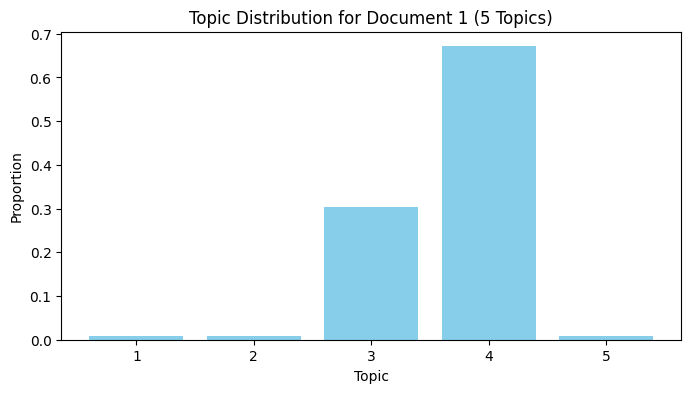

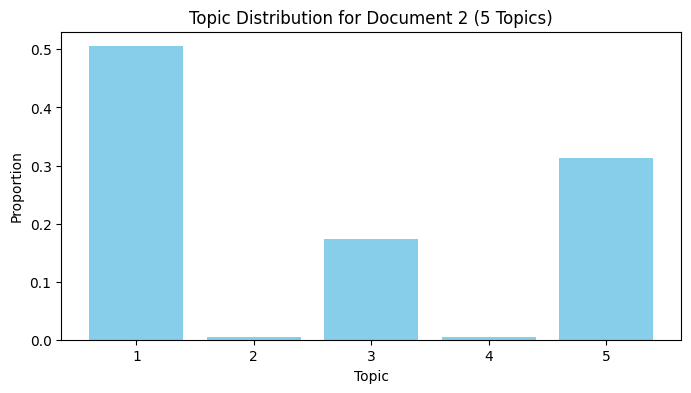

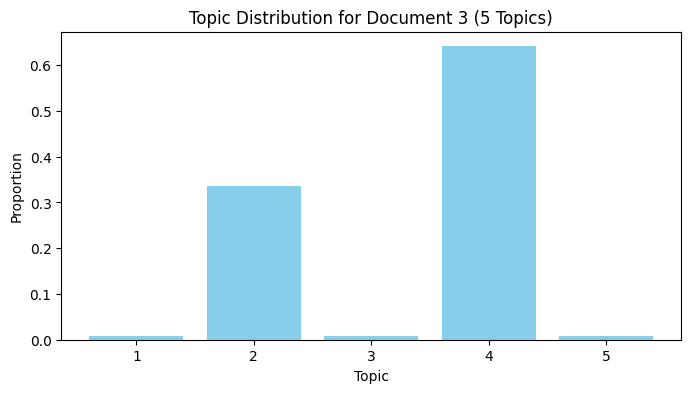

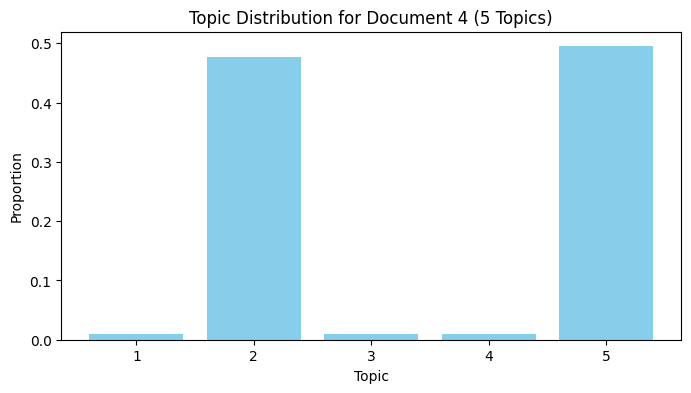

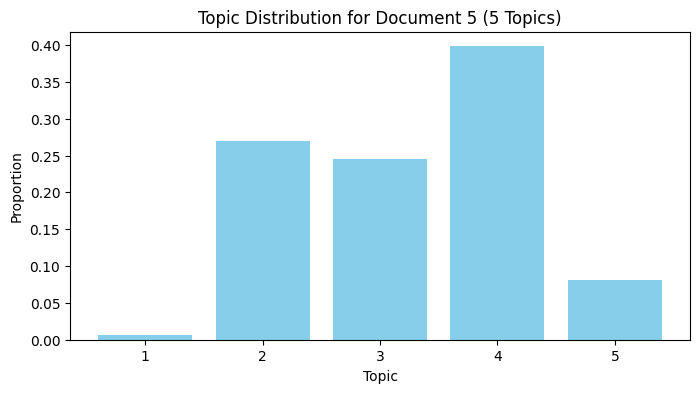

In [42]:
import matplotlib.pyplot as plt

# Visualize topic distribution for the first 5 documents
for i in range(5):
    plt.figure(figsize=(8, 4))
    plt.bar(range(1, 6), doc_topics[i], color='skyblue')  
    plt.xlabel('Topic')
    plt.ylabel('Proportion')
    plt.title(f'Topic Distribution for Document {i + 1} (5 Topics)')
    plt.xticks(range(1, 6))  
    plt.show()

# <span style="color:red">LDA Topic Modeling Assignment (5 points)</span>

## Objective
Improve the coherence score of the provided LDA model on the 20 Newsgroups dataset by experimenting with different parameters and preprocessing techniques.

## Instructions:
1. **Experiment with Different Numbers of Topics:** Try different values for the number of topics (e.g., 3, 7, 10) and observe how the coherence score and topic distributions change.
2. **Preprocessing Techniques:** Experiment with different preprocessing techniques (e.g., stemming, lemmatization) and see how they affect the topic modeling results.
3. **Visualize Results:** Use the provided code in Steps 4-7 to visualize your results.

Provide the outputs of Steps 2, 3, and 4 in your report.